### **Homework Assignment: Data Preprocessing for Machine Learning**

#### **Dataset**

Use the **California Housing Dataset** from Aurélien Géron's GitHub repo:

In [2]:
import os
import tarfile
import urllib.request
import pandas as pd

DOWNLOAD_ROOT = "https://github.com/ageron/data/raw/main/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    with tarfile.open(tgz_path) as housing_tgz:
        housing_tgz.extractall(path=housing_path)

fetch_housing_data()
df = pd.read_csv(os.path.join(HOUSING_PATH, "housing/housing.csv"))

## **Part 1: Exploratory Data Analysis (EDA)**

1. Display:

   * The first 10 rows.
   * Dataset info using `.info()`.
   * Summary statistics using `.describe()`.
   * Value counts for categorical columns (e.g., `ocean_proximity`).

2. Identify:

   * Columns with missing values.
   * Numerical vs categorical features.
   * Columns with unusual distributions or outliers.

---

## **Part 2: Handling Missing Values**

3. For missing data:

   * Drop any row or column if missing values are insignificant.
   * Use **median** imputation for `total_bedrooms`.

4. Create a `missing_report(df)` function that:

   * Returns a DataFrame: column name, count and percentage of missing values.

---

## **Part 3: Encoding Categorical Variables**

5. Encode the `ocean_proximity` column:

   * Use **One-Hot Encoding** via `pd.get_dummies()` or `OneHotEncoder`.

---

## **Part 4: Feature Scaling**

6. For numerical features:

   * Apply both **StandardScaler** and **MinMaxScaler** to features like:

     * `median_income`, `housing_median_age`, `population`, `median_house_value`
   * Plot feature histograms before and after scaling.

---

## **Part 5: Optional Feature Engineering**

7. Create meaningful new features:

   * `rooms_per_household = total_rooms / households`
   * `bedrooms_per_room = total_bedrooms / total_rooms`
   * `population_per_household = population / households`

In [4]:
# Displaying the first 10 rows of the DataFrame
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [13]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
# Handling missing values
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

Numerical Features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
Categorical Features: ['ocean_proximity']


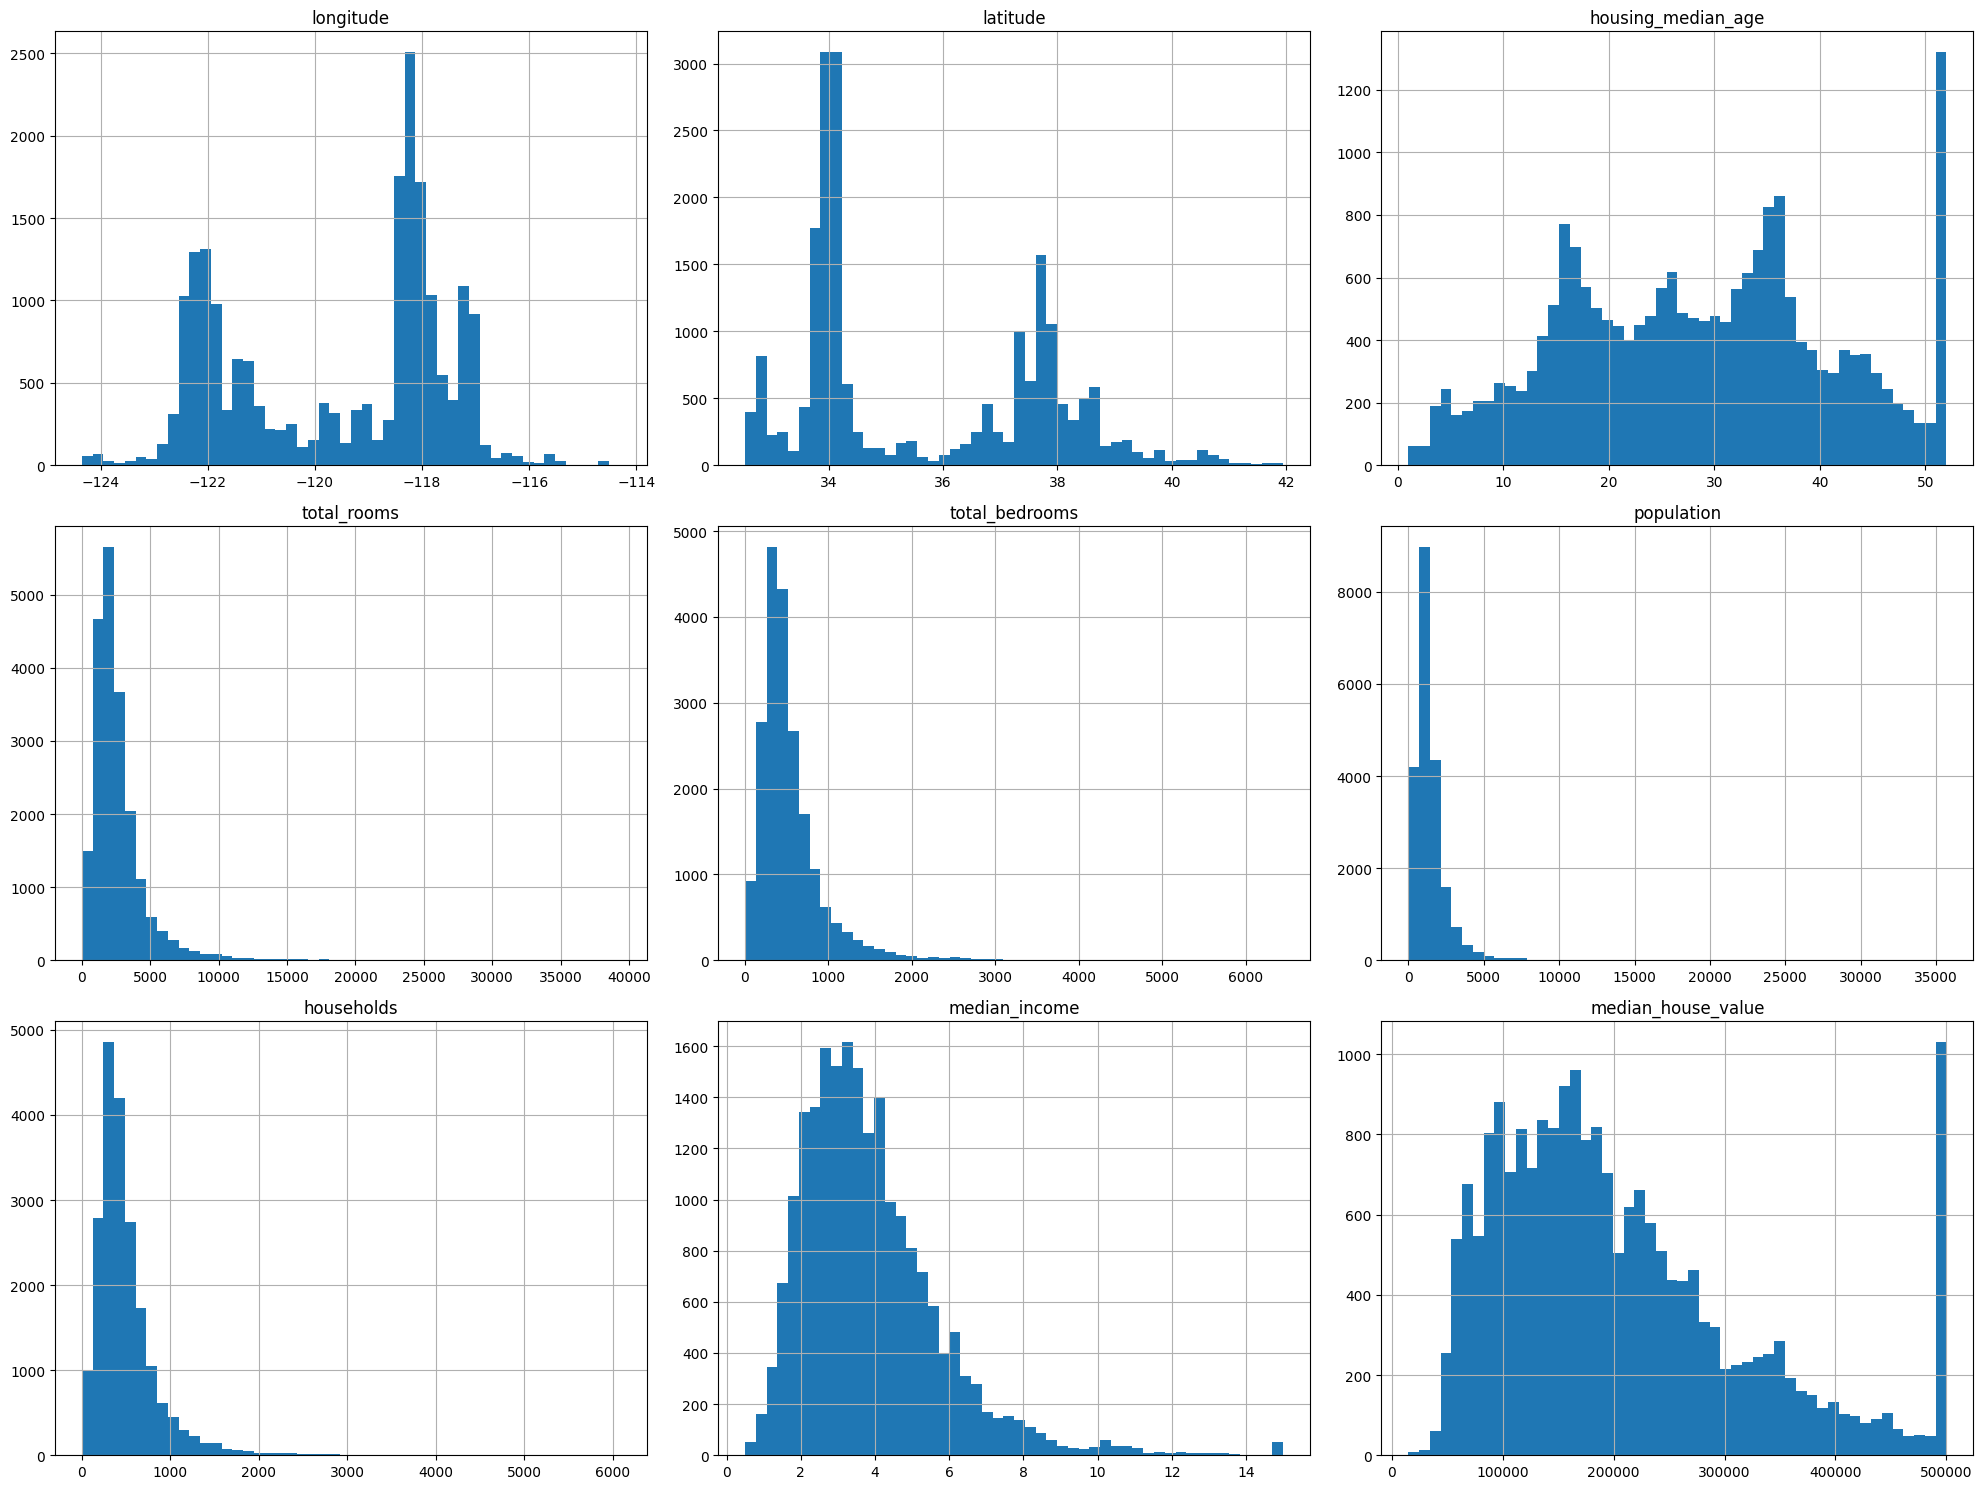

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Numerical vs Categorical
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

# Check distribution
df[numerical_features].hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

In [18]:
df_encoded = pd.get_dummies(df, columns=["ocean_proximity"]).astype(int)
df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122,37,41,880,129,322,126,8,452600,0,0,0,1,0
1,-122,37,21,7099,1106,2401,1138,8,358500,0,0,0,1,0
2,-122,37,52,1467,190,496,177,7,352100,0,0,0,1,0
3,-122,37,52,1274,235,558,219,5,341300,0,0,0,1,0
4,-122,37,52,1627,280,565,259,3,342200,0,0,0,1,0


In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Masshtablanadigan ustunlar
features_to_scale = ['median_income', 'housing_median_age', 'population', 'median_house_value']

# Standart masshtablash
standard_scaler = StandardScaler()
df_standard_scaled = df_encoded.copy()
df_standard_scaled[features_to_scale] = standard_scaler.fit_transform(df_encoded[features_to_scale])

# MinMax masshtablash
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df_encoded.copy()
df_minmax_scaled[features_to_scale] = minmax_scaler.fit_transform(df_encoded[features_to_scale])


In [20]:
df_engineered = df_encoded.copy()

df_engineered['rooms_per_household'] = df_engineered['total_rooms'] / df_engineered['households']
df_engineered['bedrooms_per_room'] = df_engineered['total_bedrooms'] / df_engineered['total_rooms']
df_engineered['population_per_household'] = df_engineered['population'] / df_engineered['households']


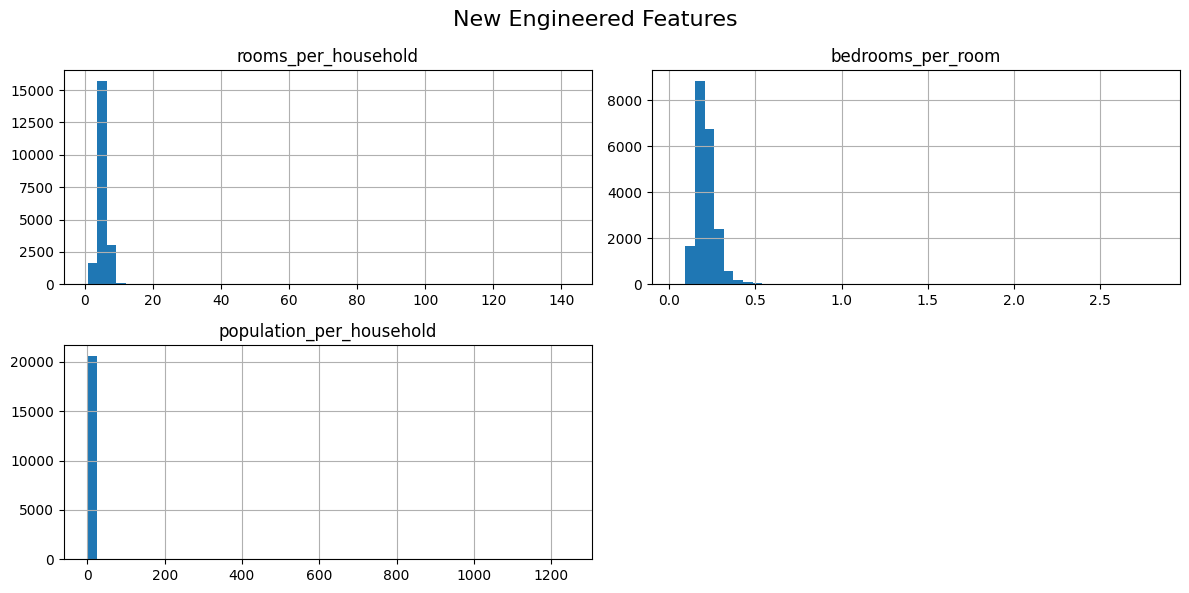

In [21]:
df_engineered[['rooms_per_household', 'bedrooms_per_room', 'population_per_household']].hist(
    bins=50, figsize=(12, 6)
)
plt.suptitle("New Engineered Features", fontsize=16)
plt.tight_layout()
plt.show()


In [22]:
df_engineered.to_csv("data/california_housing.csv", index=False)